# Nonlocality Breaking Noise with Respect to the Mermin-Klyshko Inequality

In [1]:
from context import QNetOptimizer as QNopt
from context import utilities

from pennylane import numpy as np

import matplotlib.pyplot as plt

In [67]:
mk_dir = "../../script/data/mermin-klyshko-breaking_one-sided_amplitude_damping/"

ghz_regex = lambda n: r"ghz_n-" + str(n) + r"_.*"
arb_regex = lambda n: r"arb_n-" + str(n) + r"_.*"

ghz_files = [
    utilities.get_data_files(mk_dir, ghz_regex(n))
    for n in [3,4,5]
]
arb_files = [
    utilities.get_data_files(mk_dir, arb_regex(n))
    for n in [3,4,5]
]

for i in range(3):
    print("\nn : ", i + 3)
    print("num ghz files : ", len(ghz_files[i]))
    print("num arb files : ", len(arb_files[i]))


n :  3
num ghz files :  8
num arb files :  9

n :  4
num ghz files :  8
num arb files :  9

n :  5
num ghz files :  8
num arb files :  9


In [68]:
ghz_data = [
    utilities.analyze_data_one_param_scan(ghz_files[i])
    for i in range(3)
]
arb_data = [
    utilities.analyze_data_one_param_scan(arb_files[i])
    for i in range(3)
]

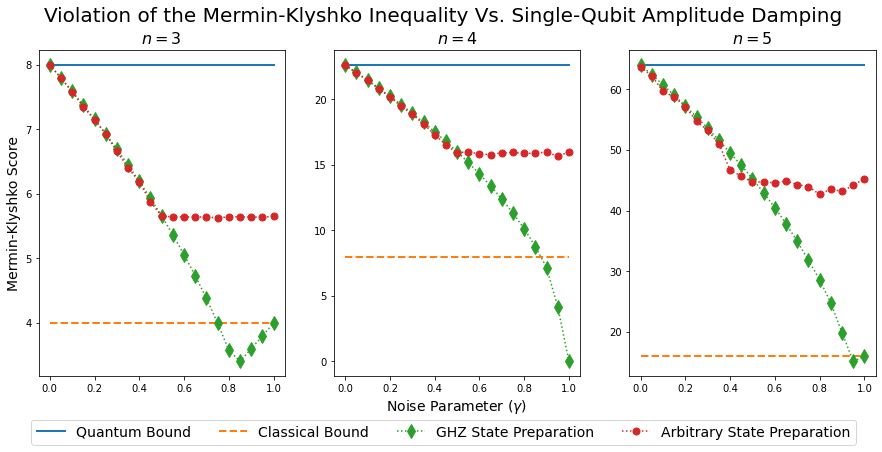

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))

axes = [ax1, ax2, ax3]

fig.suptitle("Violation of the Mermin-Klyshko Inequality Vs. Single-Qubit Amplitude Damping", size=20)

for i, n in enumerate([3,4,5]):
    ax = axes[i]
    
    ax.plot(
        ghz_data[i]["noise_params"],
        [QNopt.mermin_klyshko_quantum_bound(n)]*len(ghz_data[i]["noise_params"]),
        linewidth=2,
        label="Quantum Bound"
    )
    ax.plot(
        ghz_data[i]["noise_params"],
        [QNopt.mermin_klyshko_classical_bound(n)]*len(ghz_data[i]["noise_params"]),
        "--",
        linewidth=2,
        label="Classical Bound"
    )
    
    ax.plot(
        ghz_data[i]["noise_params"],
        ghz_data[i]["max_scores"],
        ":d",
        label="GHZ State Preparation",
        markersize=10
    )
    
    ax.plot(
        arb_data[i]["noise_params"],
        arb_data[i]["max_scores"],
        ":.",
        label="Arbitrary State Preparation",
        markersize=14
    )
    
    ax.set_title(r"$n = $" + str(n), size=16)
    if i == 1:
        ax.set_xlabel(r"Noise Parameter ($\gamma$)", size=14)

    if i == 0:
        ax.set_ylabel("Mermin-Klyshko Score", size=14)
        fig.legend(ncol=4, loc="lower center", fontsize=14, bbox_to_anchor=(0.5, -0.05))
    
    
        

plt.show()